In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/OSAGIE/Desktop/Markowitz_Data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 3 columns):
Date     1819 non-null object
PG       1819 non-null float64
^GSPC    1819 non-null float64
dtypes: float64(2), object(1)
memory usage: 42.8+ KB


In [4]:
data.tail()

,Date,PG,^GSPC
1814,3/20/2017,91.220001,2373.469971
1815,3/21/2017,91.190002,2344.020020
1816,3/22/2017,90.989998,2348.449951
1817,3/23/2017,90.769997,2345.959961
1818,3/24/2017,90.570000,2343.979980


In [5]:
data['Date'] =  pd.to_datetime(data['Date'])

In [6]:
data=data.set_index('Date')

In [7]:
data.head()

,PG,^GSPC
Date,,
2010-01-04,61.119999,1132.989990
2010-01-05,61.139999,1136.520020
2010-01-06,60.849998,1137.140015
2010-01-07,60.520000,1141.689941
2010-01-08,60.439999,1144.979980


## Normalization

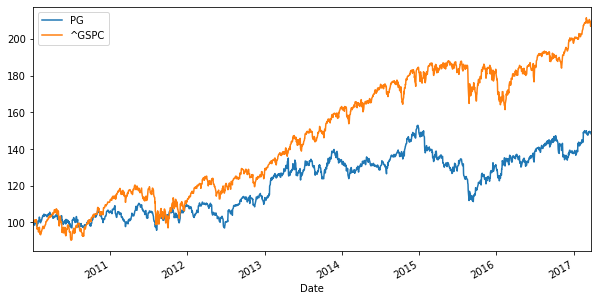

In [8]:
(data/data.iloc[0]*100).plot(figsize=(10,5))
plt.show()

In [10]:
log_return=np.log(data/data.shift(1))
log_return

,PG,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,0.003111
2010-01-06,-0.004755,0.000545
2010-01-07,-0.005438,0.003993
2010-01-08,-0.001323,0.002878
...,...,...
2017-03-20,0.002415,-0.002012
2017-03-21,-0.000329,-0.012486
2017-03-22,-0.002196,0.001888


In [12]:
log_return.mean()*250

PG       0.054082
^GSPC    0.099971
dtype: float64

In [13]:
log_return.cov()*250

,PG,^GSPC
PG,0.02048,0.012490
^GSPC,0.01249,0.023401


In [14]:
log_return.corr()

,PG,^GSPC
PG,1.000000,0.570527
^GSPC,0.570527,1.000000


In [15]:
asset=["PG","^GSPC"]
num_asset=len(asset)

In [17]:
num_asset

2

In [18]:
arr=np.random.random(2)
arr

array([0.47294908, 0.01570788])

In [19]:
arr[0]+arr[1]

0.4886569590509483

In [20]:
weights=np.random.random(num_asset)
weights/=np.sum(weights)
weights

array([0.1740944, 0.8259056])

In [21]:
weights[0]+weights[1]

1.0

### Expected portfolio Return

In [24]:
np.sum(weights * log_return.mean()) *250

0.09198209443220118

### Expected portfolio variance

In [25]:
np.dot(weights.T,np.dot(log_return.cov()*250,weights))

0.020174635224271046

### Expected portfolio volatility

In [26]:
np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*250,weights)))

0.1420374430362327

### combination of portfolio Returns and volatilty

In [28]:
portfolio_return=[]
portfolio_volatilty=[]


for x in range(1000):
    weights=np.random.random(num_asset)
    weights/=np.sum(weights)
    portfolio_return.append(np.sum(weights * log_return.mean()) *250)
    portfolio_volatilty.append(np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*250,weights))))

portfolio_return,portfolio_volatilty

([0.06628953570615878,
  0.07900374074616412,
  0.06847998842099944,
  0.07771602478601072,
  0.08826604560898342,
  0.07777562370971794,
  0.07725335709106025,
  0.055611788598487054,
  0.07030231664744147,
  0.0744756355612811,
  0.09663690644890727,
  0.0617703103447995,
  0.08081102944199718,
  0.07334952296141116,
  0.0871215642483476,
  0.08935187063388413,
  0.06986651372339764,
  0.07550845256620185,
  0.05659618277892885,
  0.06933864281674694,
  0.06859966501913628,
  0.08860415348836397,
  0.05792082846316248,
  0.08472614155615049,
  0.07148472487407029,
  0.08194813503560669,
  0.09002750901948636,
  0.06519674906687675,
  0.08176982678675669,
  0.09238201065915967,
  0.0882604385283068,
  0.0713102127042355,
  0.08091647047494037,
  0.07958698662232414,
  0.07800298706860885,
  0.0732962197570085,
  0.054748587177289545,
  0.09435825748691216,
  0.09313305771067451,
  0.06812890021360085,
  0.0774435323038504,
  0.07635354061036692,
  0.06522169811814306,
  0.075586178015

In [29]:
portfolio_return=[]
portfolio_volatilty=[]


for x in range(1000):
    weights=np.random.random(num_asset)
    weights/=np.sum(weights)
    portfolio_return.append(np.sum(weights * log_return.mean()) *250)
    portfolio_volatilty.append(np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*250,weights))))
    
portfolio_return=np.array(portfolio_return)
portfolio_volatilty=np.array(portfolio_volatilty)
portfolio_return,portfolio_volatilty

(array([0.07638609, 0.07202118, 0.06367481, 0.08280822, 0.0580076 ,
        0.08329071, 0.0825572 , 0.07953535, 0.09970262, 0.07637461,
        0.08370957, 0.0674264 , 0.07330496, 0.0674443 , 0.05490509,
        0.08116388, 0.09609072, 0.08323376, 0.08750209, 0.08649393,
        0.07975419, 0.0860916 , 0.07500858, 0.06929158, 0.06986547,
        0.07474016, 0.07859907, 0.07041326, 0.08572555, 0.07942827,
        0.07302345, 0.07113692, 0.0772246 , 0.06940257, 0.07412932,
        0.07678962, 0.06124837, 0.07473976, 0.06042567, 0.08107296,
        0.09457029, 0.06716999, 0.06878632, 0.07397887, 0.0828129 ,
        0.08463647, 0.07291129, 0.07634462, 0.05797839, 0.08349542,
        0.08371966, 0.08024375, 0.07492775, 0.07695701, 0.08367512,
        0.06973462, 0.09798647, 0.06120381, 0.09294186, 0.07559314,
        0.0716463 , 0.09580509, 0.09707886, 0.07329847, 0.06403763,
        0.06961656, 0.06257808, 0.08079269, 0.07081327, 0.06805507,
        0.08347689, 0.05638343, 0.08372735, 0.06

In [30]:
portfolio=pd.DataFrame({'Return':portfolio_return,'Volatility':portfolio_volatilty})

In [31]:
portfolio.head()

,Return,Volatility
0,0.076386,0.131065
1,0.072021,0.130849
2,0.063675,0.134035
3,0.082808,0.133728
4,0.058008,0.138748


In [32]:
portfolio.tail()

,Return,Volatility
995,0.058860,0.137917
996,0.054688,0.142380
997,0.069168,0.131412
998,0.079629,0.132066
999,0.068494,0.131626


<function matplotlib.pyplot.show(*args, **kw)>

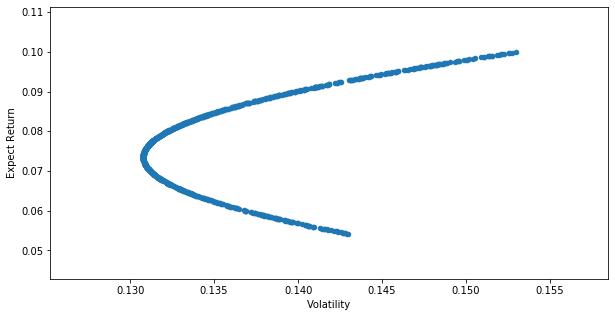

In [40]:
portfolio.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,5))
plt.xlabel('Volatility')
plt.ylabel('Expect Return')
plt.show

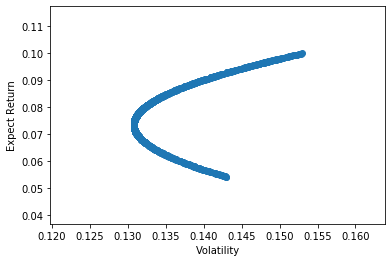

In [50]:
plt.scatter(portfolio['Volatility'],portfolio['Return'])
plt.xlabel('Volatility')
plt.ylabel('Expect Return')
plt.show()